In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import numpy as np
from matplotlib import pyplot as plt
from pylamp.neural.layers import Linear
from pylamp.neural.activations import Sigmoid, TanH, ReLU, Softmax
from pylamp.optim.optimizer import SGD
from pylamp.loss.losses import CrossEntropyLoss
from pylamp.utils.data import DataGenerator as dg 
from pylamp.neural.sequentiel import Sequentiel
from pylamp.optim.optimizer import Optim
from pylamp.utils.usps import load_usps, show_usps

## Loading Data

In [23]:
uspsdatatrain = "./data/USPS/USPS_train.txt"
uspsdatatest = "./data/USPS/USPS_test.txt"
X_train, y_train = load_usps(uspsdatatrain)
X_test, y_test = load_usps(uspsdatatest)

Label:  6
x size:  256


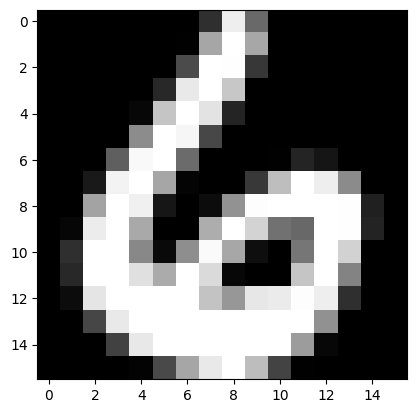

In [24]:
print('Label: ',y_train[0])
print("x size: ",len(X_train[0]))
show_usps(X_train[0])

## Testing Multi Class Model

In [25]:
num_classes = 10

### One hot encode label

In [26]:
y_train_one_hot = np.eye(num_classes)[y_train]

In [27]:
y_train_one_hot[0], y_train[0]

(array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]), 6)

### Training the model

In [65]:
# Create a sequential model
model = Sequentiel()

# Add modules to the sequential model
model.add_module(Linear(input_size=256, output_size=10))
model.add_module(Softmax())

loss_func = CrossEntropyLoss()

optimizer = Optim(model,loss_func,1e-5)

batch_size = 256
epochs = 10000

losses = SGD(optimizer,X_train, y_train_one_hot, batch_size,epochs,verbose=True)


Epoch 1/10000, Average Loss: 2.376123149888835
Epoch 1001/10000, Average Loss: 2.1822972096423787
Epoch 2001/10000, Average Loss: 2.0251287693183344
Epoch 3001/10000, Average Loss: 1.9198208952058877
Epoch 4001/10000, Average Loss: 1.8399975511826325
Epoch 5001/10000, Average Loss: 1.7817827918946296
Epoch 6001/10000, Average Loss: 1.7364082666679626
Epoch 7001/10000, Average Loss: 1.7074369381361667
Epoch 8001/10000, Average Loss: 1.6840275055084066
Epoch 9001/10000, Average Loss: 1.6638548970588507
Training finished.


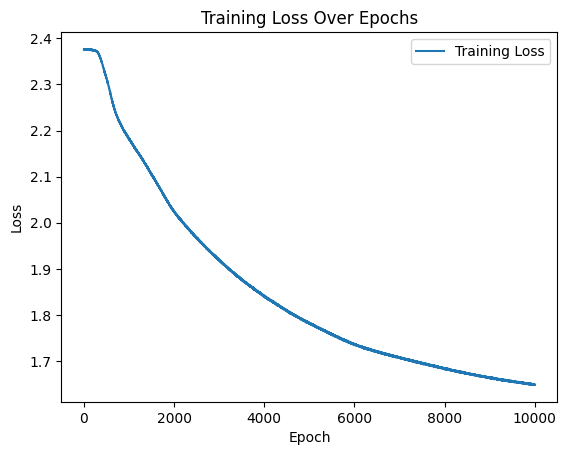

In [70]:
epochs = range(1, len(losses) + 1)
plt.plot(epochs, losses, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [69]:
y_pred = np.argmax(model.forward(X_test),axis=1)

accuracy = np.sum(y_test == y_pred)/len(y_test)

print(f'Accuracy = {accuracy}')

Accuracy = 0.7573492775286498
